In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score,plot_roc_curve

In [5]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.target.value_counts() # this looks like almost a balanced dataset

1    165
0    138
Name: target, dtype: int64

In [11]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

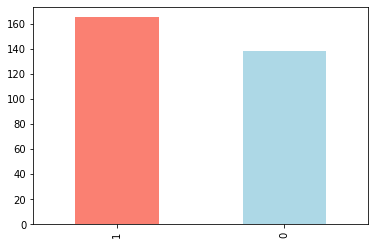

In [15]:
df.target.value_counts().plot.bar(color=["salmon","lightblue"]);

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


This shows that there is a 75% of chance that a person is female and have heart disease. Also, there is a 50% chance that a person is a male and have heart disease. So, 62.5% chance for a person to have heart disease.  

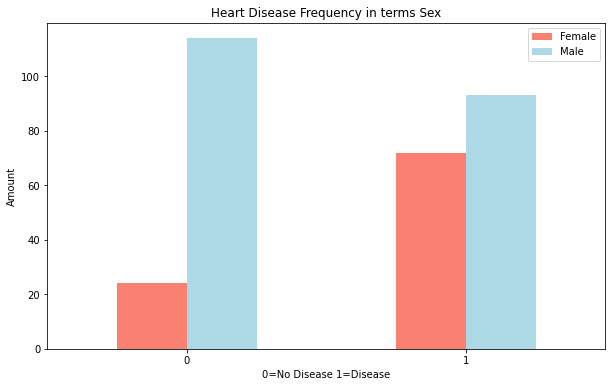

In [24]:
# making our intuition visual
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency in terms Sex")
plt.xlabel("0=No Disease 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age v/s Thalach (Max Heart Rate) for heart disease

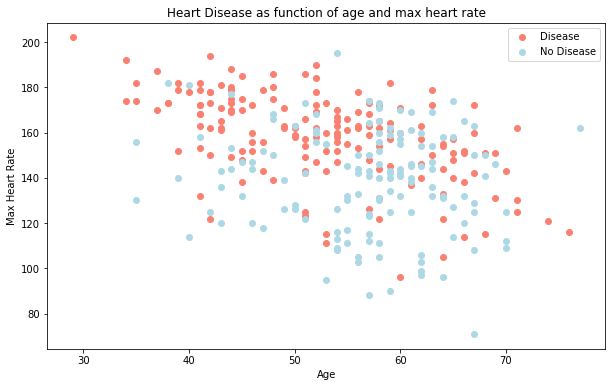

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("Heart Disease as function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

We can infer that the more younger, the higher is the max heart rate and the older one becomes, the great is the threat of a heart disease

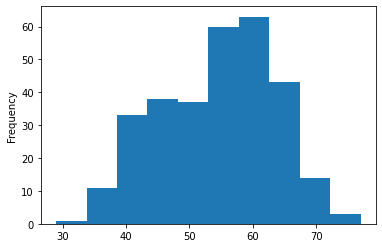

In [29]:
df.age.plot.hist(); # to check the distribution

### Heart disease frequency per chest pain type

In [34]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


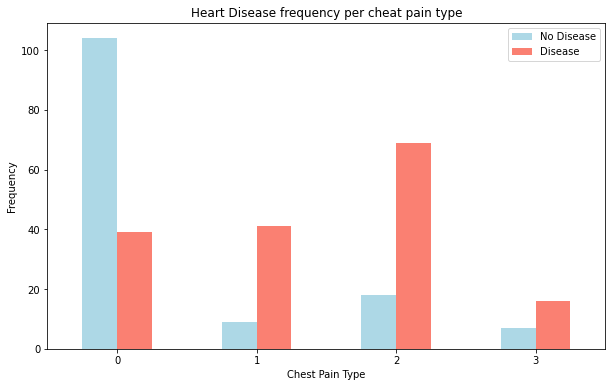

In [37]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["lightblue","salmon"])
plt.title("Heart Disease frequency per cheat pain type")
plt.ylabel("Frequency")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0)
plt.legend(["No Disease","Disease"]);

We can infer that though atypical agina(value=1) is not realted to heart but seems to have higher ratio of participants with heart disease than not having it. Thus, atypical agina is still unclear.

In [39]:
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


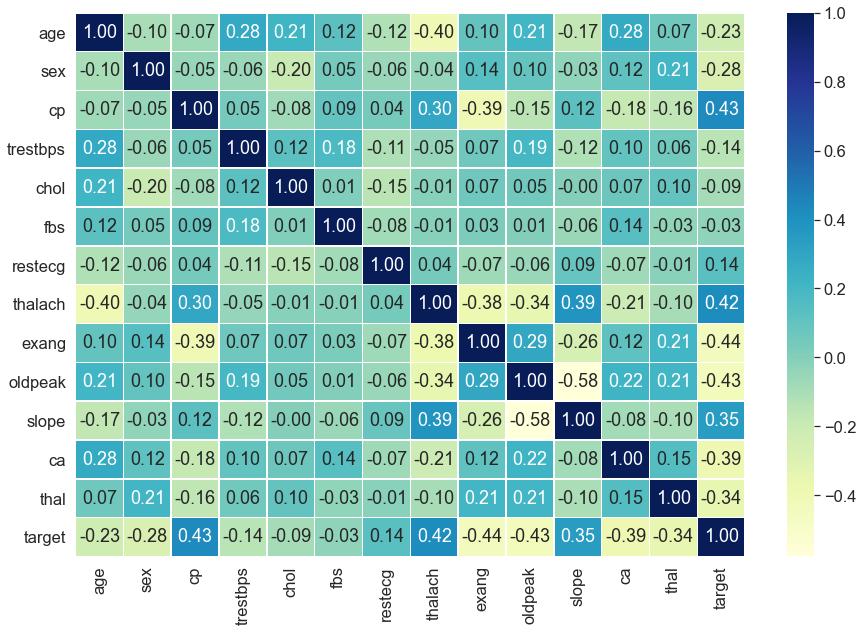

In [108]:
plt.figure(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [44]:
X=df.drop("target",axis=1)
y=df["target"]

In [46]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1


In [51]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [52]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [54]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [58]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
len(y_test)

61

In [60]:
models={"KNN":KNeighborsClassifier(),
        "Logistic_Regression":LogisticRegression(),
        "Random_Forest": RandomForestClassifier()}

In [66]:
def fitandscore(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [67]:
model_score=fitandscore(models,X_train,X_test,y_train,y_test)
model_score

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic_Regression': 0.8852459016393442,
 'Random_Forest': 0.8360655737704918}

This shows that the KNN model predicts poorly. But we can use Hyperparameter Tuning to check if it can improve

In [68]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])
model_compare

,KNN,Logistic_Regression,Random_Forest
accuracy,0.688525,0.885246,0.836066


### Hyperparamter Tuning 

In [71]:
#Let's see if KNN can perfrom better if tuned by hand first
train_scores=[]
test_scores=[]
neighbors=range(1,21)
KNN=KNeighborsClassifier()
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(X_train,y_train)
    train_scores.append(KNN.score(X_train,y_train))
    test_scores.append(KNN.score(X_test,y_test))

In [77]:
np.array(train_scores) , len(train_scores)

(array([1.        , 0.80991736, 0.77272727, 0.74380165, 0.76033058,
        0.75206612, 0.74380165, 0.7231405 , 0.71900826, 0.69421488,
        0.72727273, 0.69834711, 0.69008264, 0.69421488, 0.68595041,
        0.67355372, 0.68595041, 0.66528926, 0.68181818, 0.66942149]),
 20)

In [76]:
np.array(test_scores), len(test_scores)

(array([0.62295082, 0.63934426, 0.6557377 , 0.67213115, 0.68852459,
        0.72131148, 0.70491803, 0.68852459, 0.68852459, 0.70491803,
        0.75409836, 0.73770492, 0.73770492, 0.73770492, 0.68852459,
        0.72131148, 0.68852459, 0.68852459, 0.70491803, 0.6557377 ]),
 20)

Max KNN score on test data:75.41%


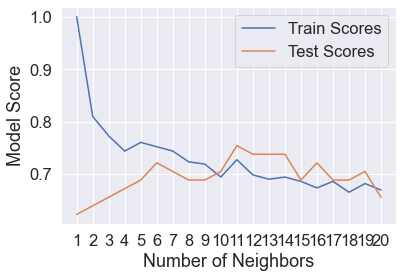

In [142]:
#plt.figure()
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score");
print(f"Max KNN score on test data:{max(test_scores)*100:.2f}%")

even after using tuning, KNN was still much less than other 2 so we can discard it

### Tuning the other 2 models using RandomziedSearchCV

In [85]:
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [87]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),cv=5,n_iter=20,param_distributions=log_reg_grid,verbose=True)
rs_log_reg.fit(X_train,y_train)
rs_log_reg.best_params_
rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


0.8852459016393442

In [89]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),cv=5,n_iter=20,param_distributions=rf_grid,verbose=True)
rs_rf.fit(X_train,y_train)
rs_rf.best_params_
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished


0.8688524590163934

In [90]:
model_compare

,KNN,Logistic_Regression,Random_Forest
accuracy,0.688525,0.885246,0.836066


Though the accuracy of RandomForestClassifier increased but atill it is less than Logistic Regression. So, we will apply gridsearchcv on Logistic Regressor model

In [91]:
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [94]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
gs_log_reg.best_params_
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.8852459016393442

#### Getting few evaluations

In [97]:
y_preds=gs_log_reg.predict(X_test)

In [98]:
np.array(y_preds)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [99]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

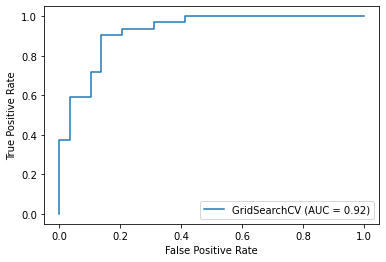

In [102]:
plot_roc_curve(gs_log_reg,X_test,y_test);

In [104]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


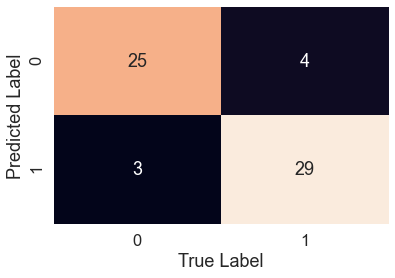

In [109]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
plot_conf_mat(y_test,y_preds)

In [110]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [111]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [114]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")

In [115]:
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [119]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [125]:
cv_precision=np.mean(cross_val_score(clf,X,y,scoring="precision",cv=5))
cv_precision

0.8215873015873015

In [126]:
cv_recall=np.mean(cross_val_score(clf,X,y,scoring="recall",cv=5))
cv_recall

0.9272727272727274

In [129]:
cv_f1=np.mean(cross_val_score(clf,X,y,cv=5,scoring="f1"))
cv_f1

0.8705403543192143

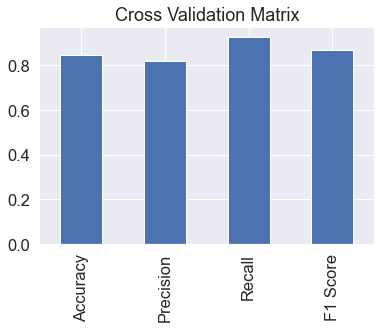

In [132]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1 Score": cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross Validation Matrix",legend=False);

In [133]:
clf.fit(X_train,y_train) # tells the importance of each featyre to the target
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [135]:
features_dict=dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [136]:
feature_df=pd.DataFrame(features_dict,index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.575909,0.470951,-0.651654,-0.699842


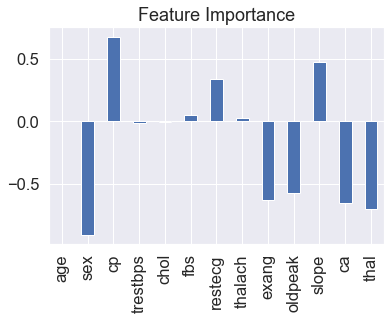

In [143]:
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [144]:
pd.crosstab(df.sex,df.target) # the sex has -ve value i.e. if value of sex inc, target dec.

target,0,1
sex,,
0,24,72
1,114,93


In [145]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
